In [1]:
import polars.selectors as cs
import polars as pl

df = r'dataset/Data Historis Nikel Berjangka.csv'
df = pl.read_csv(
  df,
  n_threads=2,
  low_memory=True,
  rechunk=True
)

df

Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
str,str,str,str,str,str,str
"""14/04/2025""","""15.503,63""","""15.104,50""","""15.530,38""","""15.086,00""","""""","""2,92%"""
"""11/04/2025""","""15.063,13""","""14.667,25""","""15.320,50""","""14.667,25""","""""","""2,61%"""
"""10/04/2025""","""14.680,13""","""14.608,63""","""14.854,50""","""14.388,00""","""""","""4,14%"""
"""09/04/2025""","""14.097,00""","""14.133,88""","""14.352,63""","""13.972,00""","""""","""-0,78%"""
"""08/04/2025""","""14.208,13""","""14.476,00""","""14.624,38""","""14.076,25""","""""","""-1,69%"""
…,…,…,…,…,…,…
"""01/12/1993""","""5.250,00""","""4.680,00""","""5.369,00""","""4.680,00""","""""","""13,27%"""
"""01/11/1993""","""4.635,00""","""4.520,00""","""4.727,00""","""4.520,00""","""""","""0,50%"""
"""01/10/1993""","""4.612,00""","""4.056,00""","""4.687,00""","""4.056,00""","""""","""14,70%"""


__pertama tama kita akan memilih kolom yang akan digunakan unutuk melatih model__

__untk model yang menggunakan lstm fitur perubahan tidak diperlukan karena berpotensi membocorkan jawaban ke model jadi akan kita hapus__

__lalu selanjutnya fitur vol tidak diperlukan karena itu merupakan kolom kosong__

__karena dataset sudah terurut jadi kolom tanggal bisa di hilangkan__

In [2]:
df = df.select(
  pl.col('Pembukaan'),
  pl.col('Tertinggi'),
  pl.col('Terendah'),
  pl.col('Terakhir'),
)

df

Pembukaan,Tertinggi,Terendah,Terakhir
str,str,str,str
"""15.104,50""","""15.530,38""","""15.086,00""","""15.503,63"""
"""14.667,25""","""15.320,50""","""14.667,25""","""15.063,13"""
"""14.608,63""","""14.854,50""","""14.388,00""","""14.680,13"""
"""14.133,88""","""14.352,63""","""13.972,00""","""14.097,00"""
"""14.476,00""","""14.624,38""","""14.076,25""","""14.208,13"""
…,…,…,…
"""4.680,00""","""5.369,00""","""4.680,00""","""5.250,00"""
"""4.520,00""","""4.727,00""","""4.520,00""","""4.635,00"""
"""4.056,00""","""4.687,00""","""4.056,00""","""4.612,00"""


__selanjutnya kita lihat dulu tipe data dari setiap kolom nya__

__setiap kolom bertipe string, padahal datanya bertipe angka__

__jadi pada langkah selanjutnya kita akan menyesuaikan tipe data unutk setiap kolomnya__

In [3]:
df = df.select(
  cs.all()
  .str.replace_all('\\.', '')
  .str.replace(',', '.')
  .cast(pl.Float64)
  .name.to_lowercase()
)

df

pembukaan,tertinggi,terendah,terakhir
f64,f64,f64,f64
15104.5,15530.38,15086.0,15503.63
14667.25,15320.5,14667.25,15063.13
14608.63,14854.5,14388.0,14680.13
14133.88,14352.63,13972.0,14097.0
14476.0,14624.38,14076.25,14208.13
…,…,…,…
4680.0,5369.0,4680.0,5250.0
4520.0,4727.0,4520.0,4635.0
4056.0,4687.0,4056.0,4612.0


__bisa kita lihat sekarang datanya sudah memiliki tipe yang benar__

__datanya sudah dalam keadaan bersih dan tidak lagi memiliki nilai null__

__kita coba untuk mendeskripsikan datanya__

In [4]:
from utils.polars.helpers import describe_

describe_(df)

COL NAME,TYPE,COUNT,NULL COUNT,MEAN,STD,MIN,25%,50%,75%,MAX,TOP,FREQ
cat,enum,u32,u32,f32,f32,cat,f32,f32,f32,cat,cat,u32
"""PEMBUKAAN""","""num""",4232,0,15991.444336,5107.967773,"""4009.5""",12427.5,15870.875,18730.0,"""61714.4""","""13950.0""",8
"""TERTINGGI""","""num""",4232,0,16193.583008,5242.789062,"""4009.5""",12549.375,16037.139648,18877.945312,"""61972.3""","""13850.0""",6
"""TERENDAH""","""num""",4232,0,15815.816406,5033.95166,"""3730.5""",12271.875,15717.330078,18608.25,"""61714.4""","""14050.0""",6
"""TERAKHIR""","""num""",4232,0,16005.546875,5150.634766,"""3873.0""",12414.375,15862.5,18737.75,"""61714.4""","""15450.0""",4


__hasil explorasi singkat__

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
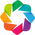

:BoxWhisker   [Fitur]   (Nilai)

In [5]:
# from holoviews import opts
from colorcet import coolwarm
from holoviews.operation.datashader import rasterize
import holoviews as hv

hv.extension('bokeh')

longDf = df.to_pandas().melt(var_name='Fitur', value_name='Nilai')
boxplot = hv.BoxWhisker(longDf, kdims='Fitur', vdims='Nilai').opts(
  colorbar=True,
  toolbar='above',
  width=1_080,
  height=600,
  cmap='coolwarm', 
  clim=(-1, 1),
  tools=['hover'],
  show_grid=True,
  xlabel=' ',
  ylabel=' ',
  box_fill_color='lightblue',
  show_legend=False,
  title='Data Outlier',
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'}
)

boxplot

__ternyata masih terdapat outlier pada data__

__kita akan menggunakan robustscaller untuk menanganinya saat membuat data latih__

In [6]:
corr = df.corr()
corr = corr.with_columns(
    pl.Series("fitur_x", corr.columns)
).unpivot(
    on=[col for col in corr.columns if col != "fitur_x"],
    index="fitur_x"
).rename({
    "variable": "fitur_y",
    "value": "korelasi"
})

rasterize(hv.HeatMap(corr)).opts(
  colorbar=True,
  toolbar='above',
  width=1_080,
  height=600,
  cmap='coolwarm', 
  clim=(-1, 1),
  tools=['hover'],
  show_grid=True,
  title='Grafik Korelasi',
  line_color='black',
  xlabel=' ',
  ylabel=' ',
  line_width=0.25,
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'}
)

:DynamicMap   []
   :HeatMap   [x,y]   (z)

__kita bisa lihat bahwa korelasi untuk setiap data diatas 90%__

__dari sini kita bisa menyimpulkan bahwa setiap data saling berkaitan__

__selanjutnya kita menggunakan datanya unutk membuat model ml lstm__

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled = scaler.fit_transform(df)

In [8]:
import numpy as np

def create_sequences(data, window_size):
  X = []
  y = []
  for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size][-1])  # harga 'Terakhir' jadi target
  return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(data_scaled, window_size)

In [9]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
from torch.utils.data import Dataset, DataLoader
import torch

class NikelDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

train_dataset = NikelDataset(X_train, y_train)
test_dataset = NikelDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [11]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=4, hidden_size=50):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # ambil output di timestep terakhir
        out = self.fc(out)
        return out.squeeze()  # hilangkan dimensi tambahan

In [12]:
from torch.optim import Adam

model = LSTMModel()
criterion = nn.MSELoss()  # Mean Squared Error untuk regresi
optimizer = Adam(model.parameters(), lr=0.001) #0.001

In [13]:
epochs = 25
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.1147
Epoch 2, Loss: 0.0233
Epoch 3, Loss: 0.0210
Epoch 4, Loss: 0.0191
Epoch 5, Loss: 0.0171
Epoch 6, Loss: 0.0172
Epoch 7, Loss: 0.0156
Epoch 8, Loss: 0.0148
Epoch 9, Loss: 0.0142
Epoch 10, Loss: 0.0139
Epoch 11, Loss: 0.0132
Epoch 12, Loss: 0.0135
Epoch 13, Loss: 0.0128
Epoch 14, Loss: 0.0128
Epoch 15, Loss: 0.0121
Epoch 16, Loss: 0.0126
Epoch 17, Loss: 0.0120
Epoch 18, Loss: 0.0118
Epoch 19, Loss: 0.0121
Epoch 20, Loss: 0.0116
Epoch 21, Loss: 0.0113
Epoch 22, Loss: 0.0112
Epoch 23, Loss: 0.0113
Epoch 24, Loss: 0.0112
Epoch 25, Loss: 0.0108


In [14]:
model.eval()
predictions = []
actuals = []

with torch.no_grad():
  for X_batch, y_batch in test_loader:
    output = model(X_batch)
    predictions.extend(output.numpy())
    actuals.extend(y_batch.numpy())

In [15]:
pred = np.array(predictions).reshape(-1, 1)
true = np.array(actuals).reshape(-1, 1)

# buat array dummy untuk kolom lain (biar scaler bisa inverse transform)
dummy = np.zeros((len(pred), 3))  # 3 kolom lain: pembukaan, tertinggi, terendah

# gabungkan dummy + prediksi sebagai kolom terakhir
pred_full = np.hstack((dummy, pred))
true_full = np.hstack((dummy, true))

# inverse transform
pred_actual = scaler.inverse_transform(pred_full)[:, -1]
true_actual = scaler.inverse_transform(true_full)[:, -1]

In [20]:
curve_true = hv.Curve((range(len(true_actual)), true_actual), 'Hari', 'Harga Penutupan', label='Aktual').opts(
  color='blue', line_width=2
)

curve_pred = hv.Curve((range(len(pred_actual)), pred_actual), 'Hari', 'Harga Penutupan', label='Prediksi').opts(
  color='red', line_width=2, line_dash='dashed'
)

# Gabungkan keduanya jadi overlay
overlay = curve_true * curve_pred

# Tambah konfigurasi plot
overlay.opts(
  title='Harga Prediksi vs Harga Aktual',
  legend_position='top_left',
  width=1_080,
  height=600,
  toolbar='above',
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'},
  tools=['hover']
)

overlay

:Overlay
   .Curve.Aktual   :Curve   [Hari]   (Harga Penutupan)
   .Curve.Prediksi :Curve   [Hari]   (Harga Penutupan)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung metrik
mae = mean_absolute_error(true_actual, pred_actual)
mse = mean_squared_error(true_actual, pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(true_actual, pred_actual)

metrics_df = pl.DataFrame({
    'Metrik': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Nilai': [mae, mse, rmse, r2]
})

bars = hv.Bars(list(zip(metrics_df['Metrik'], metrics_df['Nilai']))).opts(
  title='Metrik Error Model',
  height=600,
  width=1_080,
  logy=True,
  ylim=(0.01, None),
  toolbar='above',
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'},
  tools=['hover'],
  xlabel='Metrik',
  ylabel='Nilai',
  color='blue',
)

bars

:Bars   [x]   (y)

In [36]:
# Buat DataFrame evaluasi
df_eval = pl.DataFrame({
    "hari": list(range(len(true_actual))),  # asumsi tiap data = 1 hari
    "true": true_actual,
    "pred": pred_actual
})

# Tambahkan kolom error (residual)
df_eval = df_eval.with_columns([
    (pl.col("true") - pl.col("pred")).alias("residual")
])

# Ambil data dari Polars ke list
hari = df_eval["hari"].to_list()
residual = df_eval["residual"].to_list()

# Plot residual (bisa negatif atau positif)
curve_residual = hv.Curve((hari, residual), 'Hari', 'Residual').opts(
  color='purple',
  toolbar='above',
  line_width=2,
  title="Residual Plot",
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'},
  width=1_080,
  height=600
)

# Tampilkan
curve_residual

:Curve   [Hari]   (Residual)

In [37]:
hist = hv.Histogram(np.histogram(residual, bins=30)).opts(
  title='Distribusi Residual',
  active_tools=[],
  xlabel='Residual',
  ylabel='Frekuensi',
  color='purple',
  tools=['hover'],
  toolbar='above',
  fontsize={'title': '18pt', 'xticks': '12pt', 'yticks': '12pt'},
  height=600,
  width=1_080
)

hist

:Histogram   [x]   (Frequency)

__distribusi gausian__

__data residual bagus sesuai harapan__